(faq)=
# Frequently Asked Questions (FAQ)

In [1]:
!echo Last updated: `date +"%Y-%m-%d %H:%M:%S"`

Last updated: 2022-05-23 08:40:21


In [2]:
import options

*****

# `datetime`

## Get current time (ISO)

### Example

In [10]:
import datetime
x = datetime.datetime.now().isoformat().replace('T', ' ').split('.')[0]
x

'2023-12-07 11:24:27'

# `matplotlib`

## Create 'steps' plot

### Sample data

In [6]:
import pandas as pd
dat = pd.read_csv('data/ZonAnn.Ts+dSST.csv')
cols = [
    '90S-64S', 
    '64S-44S', 
    '44S-24S', 
    '24S-EQU', 
    'EQU-24N', 
    '24N-44N', 
    '44N-64N', 
    '64N-90N'
]
regions = dat[cols]
regions = regions.mean()
regions

90S-64S   -0.074028
64S-44S   -0.053681
44S-24S    0.047917
24S-EQU    0.083056
EQU-24N    0.066181
24N-44N    0.052500
44N-64N    0.142500
64N-90N    0.273333
dtype: float64

### Example

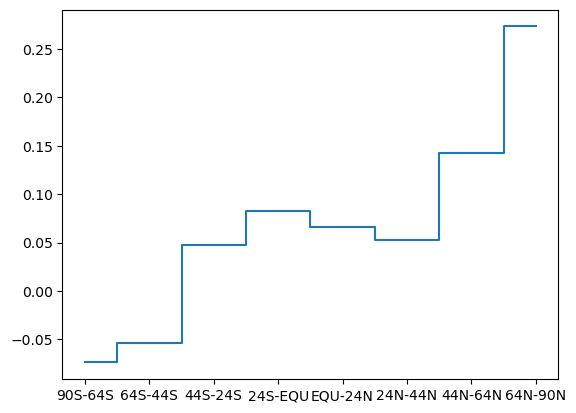

In [8]:
import matplotlib.pyplot as plt
plt.step(regions.index.to_list(), regions.to_numpy(), where='mid');

# `pandas`

## Append to CSV if exists

### Sample data

In [14]:
import pandas as pd
dat = pd.read_csv('output/stations.csv')
dat

name        city  lines  piano        lon        lat
0      Beer-Sheva Center  Beer-Sheva      4  False  34.798443  31.243288
1  Beer-Sheva University  Beer-Sheva      5   True  34.812831  31.260284
2                 Dimona      Dimona      1  False  35.011635  31.068616

### Example

In [15]:
# Delete output file if exists
import pandas as pd
import os
path_out = 'output/pandas_append_example.csv'
if os.path.exists(path_out):
    os.remove(path_out)

In [16]:
# Write
for i in range(3):
    if not os.path.exists(path_out):
        dat.to_csv(path_out, index=False)
    else:
        dat.to_csv(path_out, mode='a', header=False, index=False)

In [17]:
# Print output file contents
pd.read_csv(path_out)

name        city  lines  piano        lon        lat
0      Beer-Sheva Center  Beer-Sheva      4  False  34.798443  31.243288
1  Beer-Sheva University  Beer-Sheva      5   True  34.812831  31.260284
2                 Dimona      Dimona      1  False  35.011635  31.068616
3      Beer-Sheva Center  Beer-Sheva      4  False  34.798443  31.243288
4  Beer-Sheva University  Beer-Sheva      5   True  34.812831  31.260284
5                 Dimona      Dimona      1  False  35.011635  31.068616
6      Beer-Sheva Center  Beer-Sheva      4  False  34.798443  31.243288
7  Beer-Sheva University  Beer-Sheva      5   True  34.812831  31.260284
8                 Dimona      Dimona      1  False  35.011635  31.068616

In [18]:
# Delete output file
if os.path.exists(path_out):
    os.remove(path_out)

## Split `DataFrame` to parts

### Sample data

In [3]:
import pandas as pd
dat = pd.read_csv('output/stations.csv')
dat

name        city  lines  piano        lon        lat
0      Beer-Sheva Center  Beer-Sheva      4  False  34.798443  31.243288
1  Beer-Sheva University  Beer-Sheva      5   True  34.812831  31.260284
2                 Dimona      Dimona      1  False  35.011635  31.068616

### Function definition

In [4]:
import math
def split_dataframe(df, chunk_size = 1_000_000): 
    chunks = list()
    num_chunks = math.ceil(len(df) / chunk_size)
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return chunks

### Example

In [5]:
split_dataframe(dat, 2)

[                    name        city  lines  piano        lon        lat
 0      Beer-Sheva Center  Beer-Sheva      4  False  34.798443  31.243288
 1  Beer-Sheva University  Beer-Sheva      5   True  34.812831  31.260284,
      name    city  lines  piano        lon        lat
 2  Dimona  Dimona      1  False  35.011635  31.068616]

References:

* <https://stackoverflow.com/questions/17315737/split-a-large-pandas-dataframe>

## Shift column(s) to beginning

### Sample data

In [6]:
import pandas as pd
dat = pd.read_csv('output/stations.csv')
dat

name        city  lines  piano        lon        lat
0      Beer-Sheva Center  Beer-Sheva      4  False  34.798443  31.243288
1  Beer-Sheva University  Beer-Sheva      5   True  34.812831  31.260284
2                 Dimona      Dimona      1  False  35.011635  31.068616

### Example

In [7]:
cols = ['lon', 'lat']
dat = dat[cols  + [col for col in dat.columns if col not in cols]]
dat

lon        lat                   name        city  lines  piano
0  34.798443  31.243288      Beer-Sheva Center  Beer-Sheva      4  False
1  34.812831  31.260284  Beer-Sheva University  Beer-Sheva      5   True
2  35.011635  31.068616                 Dimona      Dimona      1  False

References:

* <https://stackoverflow.com/questions/25122099/move-column-by-name-to-front-of-table-in-pandas>

## Combine CSV files

### Question

How can we combine multiple CSV files (with same columns) into one long table?

### Sample data

In [6]:
import pandas as pd
dat = pd.read_csv('output/stations.csv')
dat.to_csv('output/stations_table_1.csv', index=False)
dat.to_csv('output/stations_table_2.csv', index=False)
dat.to_csv('output/stations_table_3.csv', index=False)

### Example

In [7]:
import pandas
import glob
files = glob.glob('output/stations_table_*.csv')
dat = []
for i in files:
    tmp = pd.read_csv(i)
    dat.append(tmp)
dat = pd.concat(dat)
dat

name        city  lines  piano        lon        lat
0      Beer-Sheva Center  Beer-Sheva      4  False  34.798443  31.243288
1  Beer-Sheva University  Beer-Sheva      5   True  34.812831  31.260284
2                 Dimona      Dimona      1  False  35.011635  31.068616
0      Beer-Sheva Center  Beer-Sheva      4  False  34.798443  31.243288
1  Beer-Sheva University  Beer-Sheva      5   True  34.812831  31.260284
2                 Dimona      Dimona      1  False  35.011635  31.068616
0      Beer-Sheva Center  Beer-Sheva      4  False  34.798443  31.243288
1  Beer-Sheva University  Beer-Sheva      5   True  34.812831  31.260284
2                 Dimona      Dimona      1  False  35.011635  31.068616

In [9]:
# Delete sample data
import os
for i in files:
    os.remove(i)

# `geopandas`

## Calculating distances in WGS84

### Question

How can we calculate distances over large regions given lon/lat points?

### Sample data

Two `(lon,lat)` points:

In [8]:
pnt1 = (0, 0)
pnt2 = (1, 0)

True distance according to [Wikipedia](https://en.wikipedia.org/wiki/Longitude#Length_of_a_degree_of_longitude):

In [9]:
dist = 111320

### Using the Harvesine formula (less accurate)

See {ref}`distance-function`:

In [10]:
import math
def distance(origin, destination):
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371000
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d

In [11]:
result = distance(pnt1, pnt2)
result = round(result)
result

111195

In [12]:
dist-result  ## Error of 125 meters

125

### Using geodesic distance function from `geopy` (most accurate)

See `geopy` [documentation](https://geopy.readthedocs.io/en/stable/#module-geopy.distance):

In [13]:
import geopy.distance
result = geopy.distance.distance(tuple(reversed(pnt1)), tuple(reversed(pnt2))).meters
result = round(result)
result

111319

In [14]:
dist - result  ## Error of 1 meter

1

### Beyond distance: The S2 Geometry Library

The [S2 Geometry Library](https://github.com/google/s2geometry) by Google can be used for more complicated calculations in WGS84, such as polygon area. It has a Python interface called [`s2sphere`](https://s2sphere.readthedocs.io/en/latest/quickstart.html).

# `rasterio`

## Splitting a raster

### Question

How can we split a raster into two equal halves, such as east-west or north-south?

### Sample data

In [25]:
import numpy as np
import rasterio
import rasterio.plot

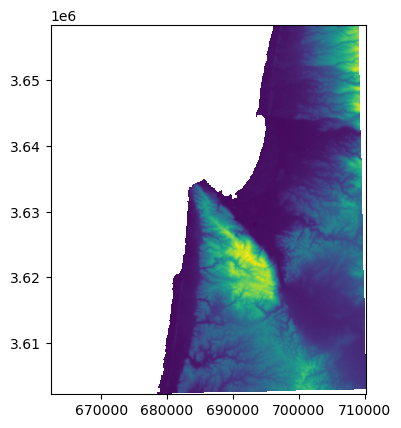

In [34]:
src = rasterio.open('output/carmel2.tif')
rasterio.plot.show(src);

### Example

In [38]:
# Column where we split to east-west
x = round(src.shape[1] / 2)
x

266

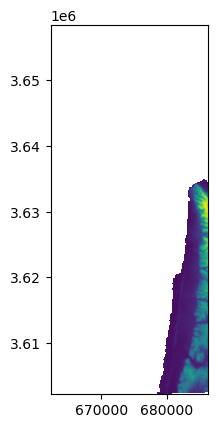

In [36]:
# Western part
w1 = rasterio.windows.Window(0, 0, x, src.shape[0])
r1 = src.read(1, window=w1)
w1_transform = src.window_transform(w1)
rasterio.plot.show(r1, transform=w1_transform);

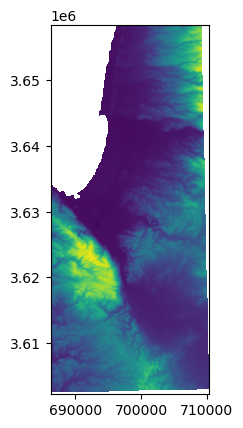

In [39]:
# Eastern part
w2 = rasterio.windows.Window(x, 0, src.shape[1]-x, src.shape[0])
r2 = src.read(1, window=w2)
w2_transform = src.window_transform(w2)
rasterio.plot.show(r2, transform=w2_transform);

## Raster to points

### Question

How can we efficiently create a point layer from a raster?

### Sample data

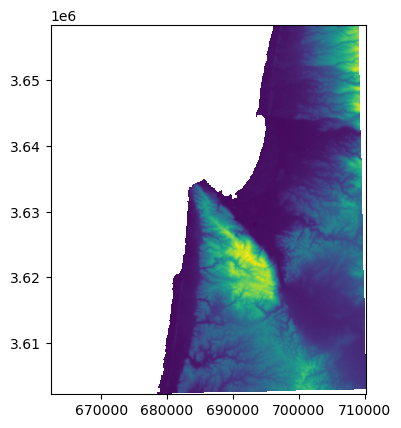

In [1]:
import rasterio
import rasterio.plot
src = rasterio.open('output/carmel2.tif')
rasterio.plot.show(src);

### Example

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
import rasterio.plot

src = rasterio.open('output/carmel2.tif')
height = src.shape[0]
width = src.shape[1]
cols, rows = np.meshgrid(np.arange(width), np.arange(height))
x, y = rasterio.transform.xy(src.transform, rows, cols)
x = np.array(x).flatten()
y = np.array(y).flatten()
z = src.read(1).flatten()
geom = gpd.points_from_xy(x, y, crs=src.crs)
dat = gpd.GeoDataFrame(data={'value':z}, geometry=geom)
dat

value                        geometry
0         NaN  POINT (662362.000 3658367.000)
1         NaN  POINT (662452.000 3658367.000)
2         NaN  POINT (662542.000 3658367.000)
3         NaN  POINT (662632.000 3658367.000)
4         NaN  POINT (662722.000 3658367.000)
...       ...                             ...
332587    NaN  POINT (709882.000 3602297.000)
332588    NaN  POINT (709972.000 3602297.000)
332589    NaN  POINT (710062.000 3602297.000)
332590    NaN  POINT (710152.000 3602297.000)
332591    NaN  POINT (710242.000 3602297.000)

[332592 rows x 2 columns]

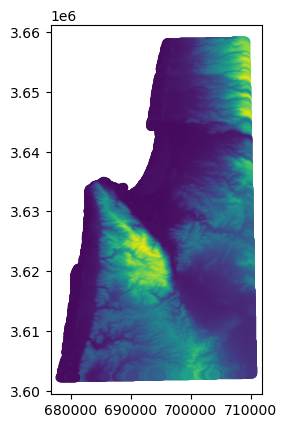

In [60]:
dat.plot(column='value');

# `arcpy`

## Listing all layers on current map

```py
import arcpy
aprx = arcpy.mp.ArcGISProject("CURRENT")
map = aprx.listMaps()[0]
layers = map.listLayers()
print([i.dataSource for i in layers])
```

```{figure} images/arcpy_list_layers.png
---
name: arcpy-list-layers
---
Listing layers on current map with `arcpy`
```

## Transforming `ecw` to `tif`

```py
arcpy.env.workspace = r"\\VBOXSVR\Downloads\ortho_2015"
files = arcpy.ListFiles("*.ecw")
for i in files:
    arcpy.management.CopyRaster(i, i.replace(".ecw", ".tif"), '', None, "256", "NONE", "NONE", '', "NONE", "NONE", "TIFF", "NONE", "CURRENT_SLICE", "NO_TRANSPOSE")
```